# **Seoul Bike Sharing Demand Data Set : prediction**

# Regression

Here the features are : 
- date/time
- temperature, 
- humidity
- wind speed
- dew point temperature
- solar radiation
- rainfall, snowfall
- holiday status
- functioning days
- seasons

The target variable is : rented bike count

## Import libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the dataset

In [64]:
dataset = pd.read_csv('SeoulBikeData_.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values.reshape(-1,1)
dataset.head(3)

,Hour,Temperature (°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature (°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Weekday,Rented Bike Count
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,254
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,204
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,173


In [65]:
dataset.shape

(8760, 14)

In [66]:
dataset.dtypes

Hour                            int64
Temperature (°C)              float64
Humidity(%)                     int64
Wind speed (m/s)              float64
Visibility (10m)                int64
Dew point temperature (°C)    float64
Solar Radiation (MJ/m2)       float64
Rainfall(mm)                  float64
Snowfall (cm)                 float64
Seasons                        object
Holiday                        object
Functioning Day                object
Weekday                        object
Rented Bike Count               int64
dtype: object

In [67]:
print(X.shape)

(8760, 13)


In [68]:
print(y.shape)

(8760, 1)


## Encoding categorical data

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [9,10,11,12])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [70]:
print(X)

[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]]


## Splitting the dataset into the Training set and Test set

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## **Multiple linear regression**

**Training**

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

**Predicting**

In [11]:
y_pred_lin = reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_lin.reshape(len(y_pred_lin),1), y_test.reshape(len(y_test),1)),1))

[[ 99.96 262.  ]
 [494.08 338.  ]
 [216.92 173.  ]
 [191.62  22.  ]
 [270.73  65.  ]
 [491.76 397.  ]
 [407.76 484.  ]
 [261.55 186.  ]
 [171.23  13.  ]
 [487.15 248.  ]
 [304.79  32.  ]
 [491.67 398.  ]
 [279.88 200.  ]
 [467.98 451.  ]
 [235.87 460.  ]
 [109.58  70.  ]
 [446.04 398.  ]
 [ 75.6  328.  ]
 [237.47 328.  ]
 [239.75 930.  ]]


**Evaluating the Model Performance**

In [12]:
from sklearn.metrics import r2_score
R2_lin =  r2_score(y_test, y_pred_lin)
print('R2_lin = {:.2f} %'.format(R2_lin*100))

R2_lin = -3.07 %


**K-fold**

In [13]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: -55.20 %


## **Polynomial regression**

**Training**

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression()

**Predicting**

In [15]:
y_pred_poly = poly_regressor.predict(poly_reg.transform(X_test))
print(np.concatenate((y_pred_poly.reshape(len(y_pred_poly),1), y_test.reshape(len(y_test),1)),1))

[[ 650.89  262.  ]
 [ 360.23  338.  ]
 [ 102.01  173.  ]
 [ 109.89   22.  ]
 [ -82.11   65.  ]
 [-161.68  397.  ]
 [1333.43  484.  ]
 [ 416.87  186.  ]
 [ 203.12   13.  ]
 [ 296.24  248.  ]
 [ 188.7    32.  ]
 [ 478.93  398.  ]
 [ -31.47  200.  ]
 [ 402.34  451.  ]
 [ -16.89  460.  ]
 [ 138.15   70.  ]
 [ 176.25  398.  ]
 [ 366.5   328.  ]
 [  93.83  328.  ]
 [ -14.13  930.  ]]


**Evaluating the Model Performance**

In [16]:
R2_poly =  r2_score(y_test, y_pred_poly)
print('R2_poly = {:.2f} %'.format(R2_poly*100))

R2_poly = -194.80 %


**K-fold**

In [17]:
accuracies = cross_val_score(estimator = poly_regressor, X = X_poly, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: -2958.95 %


## **Decision tree regression**

**Training**

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

**Predicting**

In [19]:
y_pred_tree = tree_reg.predict(X_test)
print(np.concatenate((y_pred_tree.reshape(len(y_pred_tree),1), y_test.reshape(len(y_test),1)),1))

[[167. 262.]
 [449. 338.]
 [107. 173.]
 [ 85.  22.]
 [112.  65.]
 [353. 397.]
 [388. 484.]
 [285. 186.]
 [ 41.  13.]
 [353. 248.]
 [ 82.  32.]
 [353. 398.]
 [ 82. 200.]
 [447. 451.]
 [490. 460.]
 [ 89.  70.]
 [323. 398.]
 [308. 328.]
 [937. 328.]
 [490. 930.]]


**Evaluating the Model Performance**

In [20]:
R2_tree = r2_score(y_test, y_pred_tree)
print('R2_tree = {:.2f} %'.format(R2_tree*100))

R2_tree = 26.53 %


**K-fold**

In [21]:
accuracies = cross_val_score(estimator = tree_reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 2.23 %


**Grid search**

In [22]:
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion' : ['mse'],
               'max_depth' : [2,4,6,8,10,12],
               'min_samples_leaf' : [2,4,6,8,10,12],
               'min_impurity_split' : [2,4,6,8,10,12]}]

grid_search = GridSearchCV(estimator = tree_reg,
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 44.79 %
Best Parameters: {'criterion': 'mse', 'max_depth': 4, 'min_impurity_split': 2, 'min_samples_leaf': 2}


## **Random forest regression**

**Training**

In [24]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

**Predicting**

In [25]:
y_pred_forest = forest_reg.predict(X_test)
print(np.concatenate((y_pred_forest.reshape(len(y_pred_forest),1), y_test.reshape(len(y_test),1)),1))

[[182.9 262. ]
 [470.7 338. ]
 [145.7 173. ]
 [121.3  22. ]
 [ 86.3  65. ]
 [472.1 397. ]
 [414.2 484. ]
 [264.1 186. ]
 [134.5  13. ]
 [377.8 248. ]
 [ 98.2  32. ]
 [469.9 398. ]
 [283.6 200. ]
 [480.1 451. ]
 [221.  460. ]
 [137.3  70. ]
 [363.9 398. ]
 [303.7 328. ]
 [383.9 328. ]
 [435.1 930. ]]


**Evaluating the Model Performance**

In [26]:
R2_forest = r2_score(y_test, y_pred_forest)
print('R2_forest = {:.2f} %'.format(R2_forest*100))

R2_forest = 53.78 %


**K-fold**

In [27]:
accuracies = cross_val_score(estimator = forest_reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 51.93 %
Standard Deviation: 46.80 %


**Grid search**

In [28]:
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [29]:
from sklearn.model_selection import GridSearchCV
parameters = [{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 40, 60, 80, 100]}]

grid_search = GridSearchCV(estimator = forest_reg,
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 69.59 %
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## **Support Vector Regression**

**Training**

In [30]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'linear')
svr_reg.fit(X_train, y_train)

SVR(kernel='linear')

**Predicting**

In [31]:
y_pred_svr = svr_reg.predict(X_test)
print(np.concatenate((y_pred_svr.reshape(len(y_pred_svr),1), y_test.reshape(len(y_test),1)),1))

[[126.67 262.  ]
 [429.99 338.  ]
 [200.65 173.  ]
 [182.8   22.  ]
 [178.93  65.  ]
 [388.55 397.  ]
 [342.71 484.  ]
 [177.75 186.  ]
 [201.88  13.  ]
 [381.45 248.  ]
 [296.08  32.  ]
 [406.19 398.  ]
 [182.08 200.  ]
 [471.31 451.  ]
 [212.53 460.  ]
 [127.76  70.  ]
 [365.79 398.  ]
 [106.72 328.  ]
 [245.39 328.  ]
 [216.46 930.  ]]


**Evaluating the Model Performance**

In [32]:
R2_svr = r2_score(y_test, y_pred_svr)
print('R2_svr = {:.2f} %'.format(R2_svr*100))

R2_svr = 5.64 %


**K-fold**

In [33]:
accuracies = cross_val_score(estimator = svr_reg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 29.47 %
Standard Deviation: 49.44 %


**Grid search**

In [34]:
svr_reg.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [36]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.01, 0.1, 1],
            'epsilon': [0.0005, 0.005, 0.05],
            'gamma': [0.0001, 0.001, 0.005]}]

grid_search = GridSearchCV(estimator = svr_reg,
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 33.09 %
Best Parameters: {'C': 0.1, 'epsilon': 0.0005, 'gamma': 0.0001}


## **K-NN model**

**Training + prediction**

In [74]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

Ks = 200
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

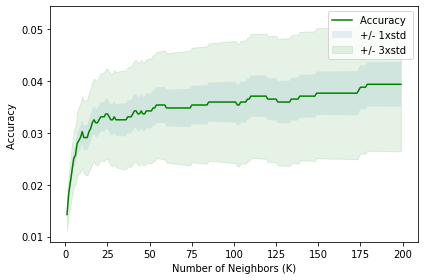

In [75]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

**Evaluating the Model Performance**

In [76]:
print( 'The best accuracy was with = {:.2f} %'.format((mean_acc.max())*100), "with k=", mean_acc.argmax()+1) 

The best accuracy was with = 3.94 % with k= 179


**K-fold**

In [86]:
classifier =  KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 3.15 %
Standard Deviation: 0.17 %


**Grid search**

In [88]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 199,
 'p': 2,
 'weights': 'uniform'}

In [91]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors' : [100, 200, 300, 5000],
               'weights' : ['uniform', 'distance'],
               'metric' : ['euclidean', 'manhattan', 'minkowski'],
               'min_samples_leaf' : range(1,5)}]

grid_search = GridSearchCV(estimator = neigh,
                           param_grid = parameters,
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

ValueError: Invalid parameter min_samples_leaf for estimator KNeighborsClassifier(metric='euclidean', n_neighbors=199). Check the list of available parameters with `estimator.get_params().keys()`.